In [1]:
!pip install newsapi-python
import os
import pandas as pd
%matplotlib inline

  Using cached newsapi_python-0.2.6-py2.py3-none-any.whl (7.9 kB)


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [20]:
# Read your api key environment variable
from path import Path
from dotenv import load_dotenv
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv('NEWS_API')

In [21]:
# Create a newsapi client

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [24]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin AND Bitcoin",
                                  language="en"  , page_size=100,
                                  sort_by='relevancy')                                                      

In [25]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum AND Ethereum',
                                  language='en',
                                  page_size=100,
                                  sort_by='relevancy')

In [26]:
# Define function to create dataframes from news api pull
def create_df(news):
    articles = []
    for article in news:
        try:
            text = article['content']
            articles.append({
                'text': text,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [27]:
# Create dataframes for each topic
btc_df = create_df(btc_news['articles'])
btc_df.dropna(inplace=True)

eth_df = create_df(eth_news['articles'])
eth_df.dropna(inplace=True)

btc_df.head()

,text
0,"As it promised earlier this year, Tesla now ac..."
1,The inevitable has happened: You can now purch...
2,Tesla made headlines earlier this year when it...
3,One of the strictest crackdowns worldwide\r\nP...
4,The hacker behind last years big Twitter hack\...


In [28]:
# Create the Bitcoin sentiment scores DataFrame

# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in btc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(text_sent)

btc_df = btc_df.join(btc_sentiment_df)

btc_df.columns = ['Article','Compound','Positive','Neutral','Negative']

btc_df.head()

,Article,Compound,Positive,Neutral,Negative
0,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.873,0.000
1,The inevitable has happened: You can now purch...,0.3182,0.065,0.935,0.000
2,Tesla made headlines earlier this year when it...,0.2023,0.050,0.950,0.000
3,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.890,0.110
4,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.858,0.142


In [29]:
# Create the ethereum sentiment scores DataFrame

# Sentiment scores dictionaries
text_sent = {
    'text_compound': [],
    'text_pos': [],
    'text_neu': [],
    'text_neg': [],
}

# Get sentiment for the text and the title
for index, row in eth_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row['text'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(text_sent)

eth_df = eth_df.join(eth_sentiment_df)

eth_df.columns = ['Article','Compound','Positive','Neutral','Negative']

eth_df.head()

,Article,Compound,Positive,Neutral,Negative
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.890,0.110
1,Famed auction house Christies just sold its fi...,0.0000,0.000,1.000,0.000
2,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.920,0.080
3,Here's everything you need to know about non-f...,-0.1531,0.000,0.938,0.062
4,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.916,0.000


In [30]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,98.000000,98.000000,98.000000,98.000000
mean,0.105210,0.048816,0.918796,0.022204
std,0.316610,0.064622,0.128996,0.052764
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.876500,0.000000
50%,0.000000,0.018000,0.950000,0.000000
75%,0.311425,0.079000,1.000000,0.000000
max,0.908000,0.340000,1.000000,0.326000


In [31]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,88.000000,88.000000,88.000000,88.000000
mean,0.173110,0.065784,0.908250,0.025955
std,0.407093,0.067502,0.078109,0.055099
min,-0.910000,0.000000,0.664000,0.000000
25%,0.000000,0.000000,0.861500,0.000000
50%,0.152950,0.063000,0.918500,0.000000
75%,0.476700,0.102500,1.000000,0.007250
max,0.837700,0.251000,1.000000,0.299000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [33]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)
    
    # Create a list of the words
    sentence = sent_tokenize(clean_text)
    words = []
    for sent in sentence:
        word = word_tokenize(sent)
        words = words + word    
        
    # Convert the words to lowercase
    words_lc = [word.lower() for word in words]    
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    words_sw = [word for word in words_lc if word not in sw]
    
    # Lemmatize Words into root words
    output = [lemmatizer.lemmatize(word) for word in words_sw]
    
    return output

In [34]:
# Create a new tokens column for bitcoin
btc_df['Tokens'] = [tokenizer(text) for text in btc_df['Article']]
btc_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.873,0.000,"[promised, earlier, year, tesla, accepts, paym..."
1,The inevitable has happened: You can now purch...,0.3182,0.065,0.935,0.000,"[inevitable, happened, purchase, tesla, vehicl..."
2,Tesla made headlines earlier this year when it...,0.2023,0.050,0.950,0.000,"[tesla, made, headline, earlier, year, took, s..."
3,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.890,0.110,"[one, strictest, crackdown, worldwidephoto, mi..."
4,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.858,0.142,"[hacker, behind, last, year, big, twitter, hac..."


In [35]:
# Create a new tokens column for ethereum
eth_df['Tokens'] = [tokenizer(text) for text in eth_df['Article']]
eth_df.head()

,Article,Compound,Positive,Neutral,Negative,Tokens
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.890,0.110,"[one, strictest, crackdown, worldwidephoto, mi..."
1,Famed auction house Christies just sold its fi...,0.0000,0.000,1.000,0.000,"[famed, auction, house, christie, sold, first,..."
2,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.920,0.080,"[move, fast, break, thing, get, hackedthats, h..."
3,Here's everything you need to know about non-f...,-0.1531,0.000,0.938,0.062,"[here, everything, need, know, nonfungible, to..."
4,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.916,0.000,"[opensea, one, handful, nft, marketplace, expl..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [37]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('char', 'reuters'), 32),
 (('reuters', 'stafffile'), 19),
 (('stafffile', 'photo'), 19),
 (('virtual', 'currency'), 18),
 (('illustration', 'taken'), 18),
 (('photo', 'representation'), 14),
 (('representation', 'virtual'), 12),
 (('currency', 'bitcoin'), 12),
 (('picture', 'illustration'), 9),
 (('char', 'march'), 9)]

In [38]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('nonfungible', 'token'), 12),
 (('graphic', 'card'), 7),
 (('char', 'reuters'), 6),
 (('king', 'leon'), 4),
 (('cryptocurrency', 'exchange'), 4),
 (('reuters', 'stafffile'), 4),
 (('stafffile', 'photo'), 4),
 (('geforce', 'rtx'), 4),
 (('expressed', 'entrepreneur'), 4),
 (('entrepreneur', 'contributor'), 4)]

In [39]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [40]:
# Get the top 10 words for Bitcoin
big_string = ' '.join(btc_df["Article"])
processed = tokenizer(big_string)
token_count(processed)

[('char', 96),
 ('bitcoin', 69),
 ('reuters', 65),
 ('photo', 28),
 ('currency', 22),
 ('stafffile', 19),
 ('taken', 19),
 ('virtual', 18),
 ('illustration', 18),
 ('tesla', 17)]

In [41]:
# Get the top 10 words for Ethereum
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 93),
 ('cryptocurrency', 25),
 ('bitcoin', 23),
 ('digital', 21),
 ('new', 20),
 ('token', 19),
 ('nfts', 17),
 ('ethereum', 16),
 ('nft', 14),
 ('nonfungible', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [43]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [50, 25]

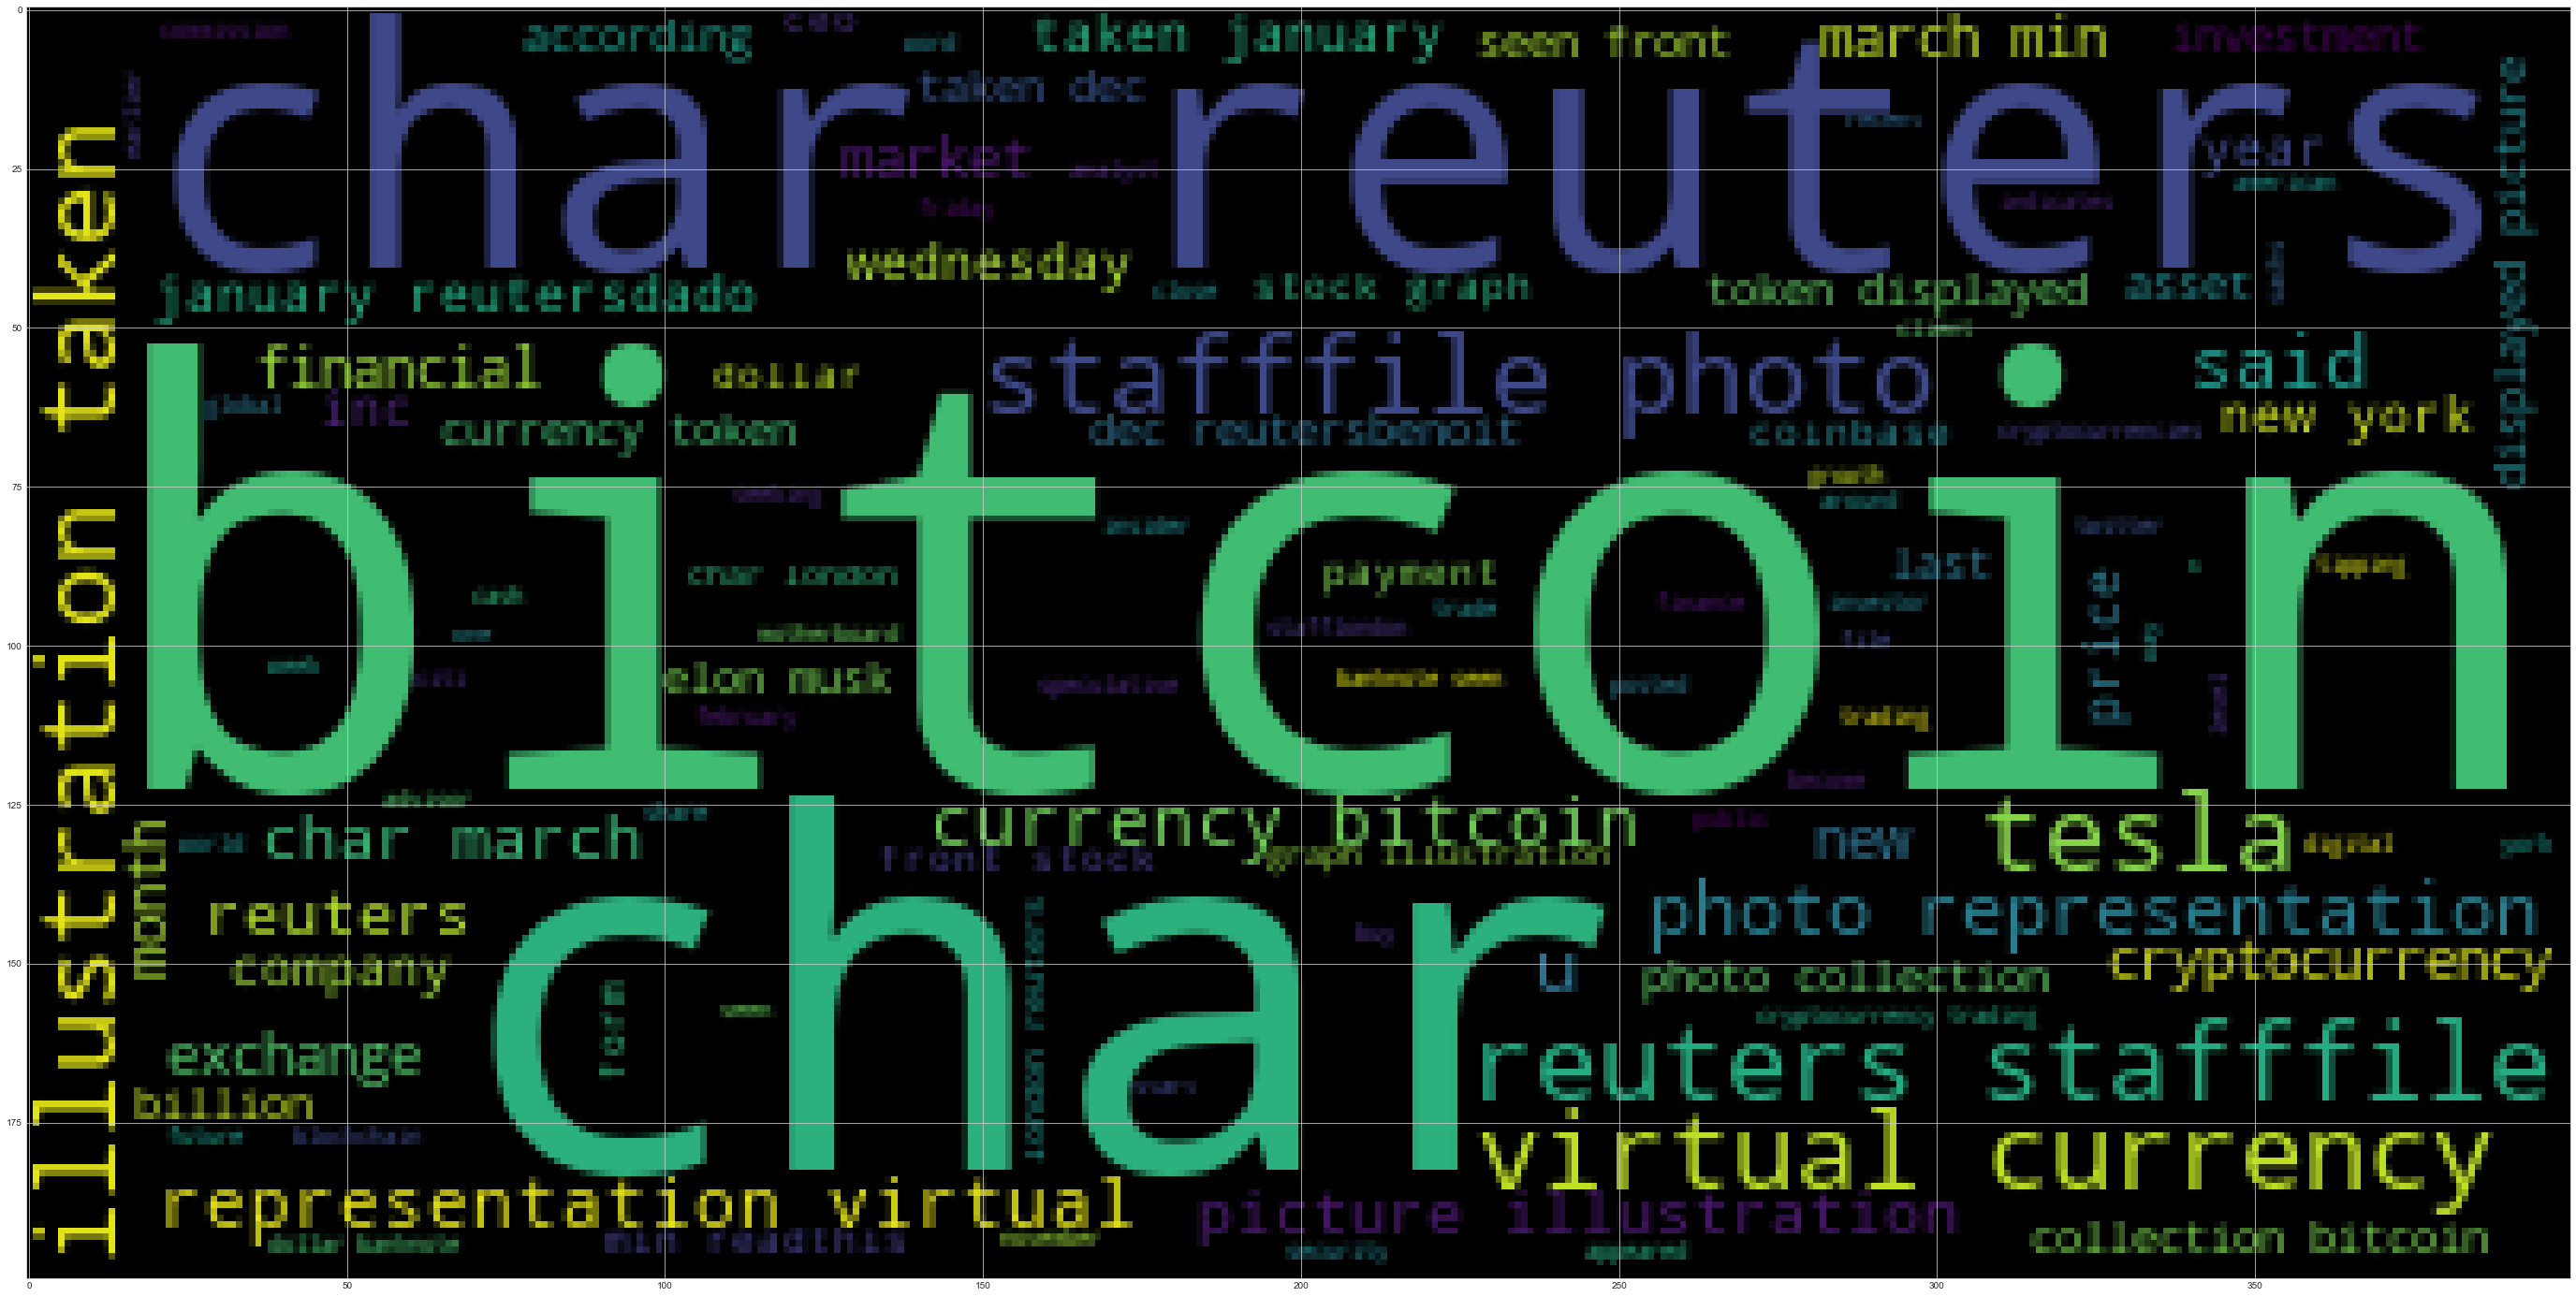

In [44]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

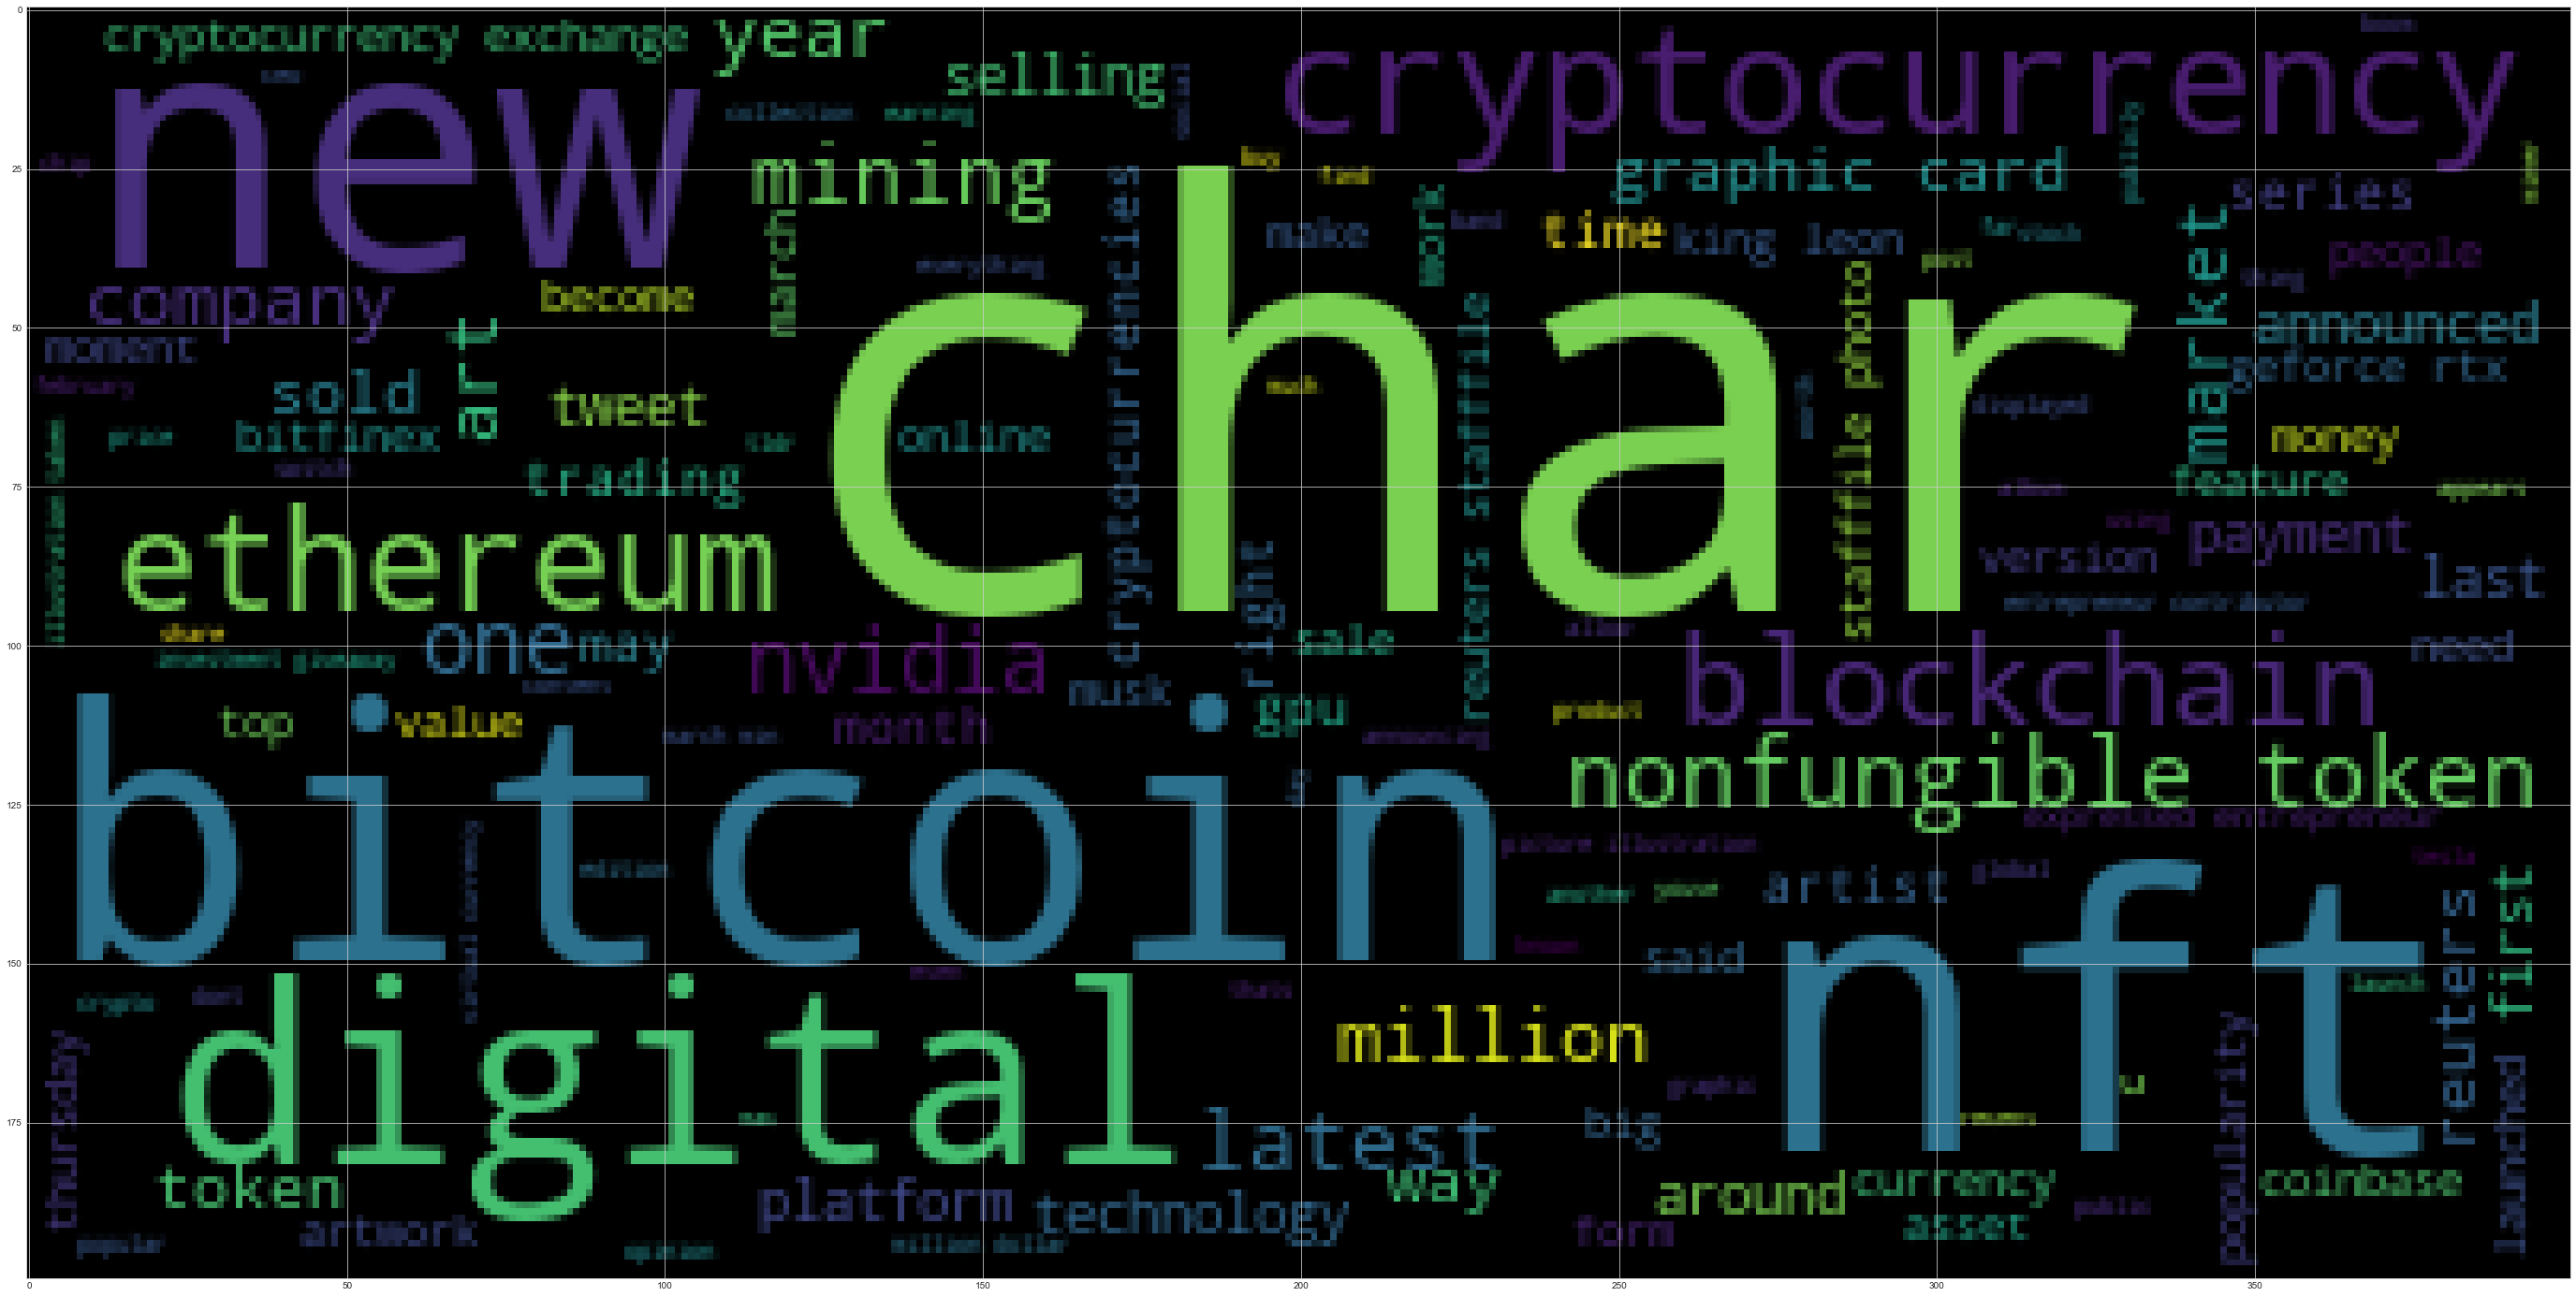

In [45]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_df['Article'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [51]:
!pip install spacy
import spacy
from spacy import displacy

In [69]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [53]:
# Concatenate all of the bitcoin text together
btc_text = ' '.join(btc_df['Article'])
btc_text

'As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars] The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars] Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars] One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage ha

In [61]:
# Run the NER processor on all of the text
!pip install doc
!pip install npkPy

  Created wheel for doc: filename=doc-0.1.0-py3-none-any.whl size=1043 sha256=365eb523fb5294e191d673db87a39e93c49b51187a324f97a623f131385b7484
  Stored in directory: c:\users\visha\appdata\local\pip\cache\wheels\a9\ed\da\15f8a308cb99ed9f4d7b7f8a209f7789c83602f7e26d775d60
Successfully built doc


In [70]:
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [71]:
# Render the visualization
displacy.render(doc, style='ent')

In [72]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
India GPE
Reuters ORG
This morning TIME
Coinbase WORK_OF_ART
American NORP
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
week of February DATE
North American NORP
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
KTS Design/Science Photo Library/G

---

## Ethereum NER

In [73]:
# Concatenate all of the ethereum text together
eth_text = ' '.join(eth_df['Article'])
eth_text

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] Move fast, break things, get hacked.\r\nThat’s what happened at Roll, the social currency platform that allows creators to mint and distribute their own Ethereum-based cryptocurrency known as social to… [+3813 chars] Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.) OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new 

In [74]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [75]:
# Render the visualization
displacy.render(doc, style='ent')

In [76]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Ethereum ORG
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
MetaMask PRODUCT
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
over $12,000 MONEY
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
India GPE
Reuters ORG
Leon PRODUCT
more than $2 million MONEY
Getty Images PERSON
Two CARDINAL
Ethereum PERSON
The Blockchain Certification Advanced Training Bundle WORK_OF_ART
20.60 MONEY
as of Feb. 25 DATE
96% PERCENT
Digital ORG
Grayscale Investments ORG
Wednesday DATE
five CARDINAL
13 CARDINAL
Reuters ORG
Bitcoin PERSON
April 24, 2020 DATE
Reuters ORG
Dec